In [75]:
%load_ext autoreload
%autoreload 2

import model
import importlib as imp

import numpy as np, pandas as pd


import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


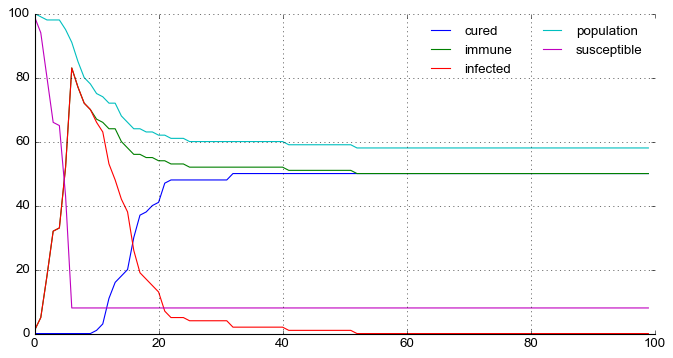

In [159]:
imp.reload(model)
world = model.World(randomize=True)

populations = {}
for i in range(100):
    world.evolve()
    
    s = world.census()
    populations[i] = s

populations = pd.concat(populations)

df = populations.copy()
df= df.stack().unstack(1).unstack(1)

agg = df.stack(0).sum(axis=1).unstack()





plt.style.use('classic')
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 12})

fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.grid(True,axis='both',linestyle=':')

for c in agg.columns:
    ax.plot(agg[c])

ax.legend(loc='best', fontsize=12, frameon=False, ncol=2)
plt.show()

In [13]:
import numpy as np
np.random.shuffle(['a','b'])